In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [293]:
df=pd.read_csv('C:/Users/Rahul/Desktop/Internship/Projects/2nd phase/Titanic survived Project.csv')

In [294]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [295]:
df.shape

(891, 12)

In [296]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerID, Name, Ticket & Cabin are unique identifiers and are unlikely to have any impact on predicting the survival. Hence droping the columns from the data set.

In [297]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [298]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


The new shape of DataFrame is 891x8.

In [299]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [300]:
df.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Examining whether Null values are present

In [301]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

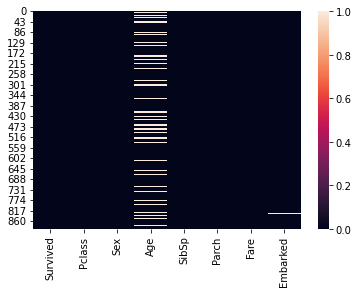

In [302]:
sns.heatmap(df.isna())

There are 177 Null values present in Age column and 2 Null values in Embarked.

We need to handle the Nan values before analysis of data.

In [303]:
#Replacing the missing values in the Age column with the mean method

age_mean=df['Age'].mean()

df['Age'].fillna(age_mean, inplace=True)

In [304]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [305]:
#Replacing the missing values in the Embarked column with the mode method

mode_embarked = df['Embarked'].mode()[0]

df['Embarked'].fillna(mode_embarked, inplace=True)

In [306]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Examining whether Null values are still present

In [307]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

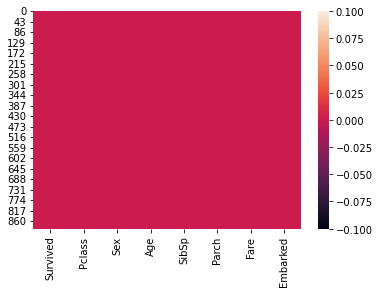

In [308]:
sns.heatmap(df.isna())

No Null present in the data.

Checking for any duplicate data

In [309]:
df.duplicated(keep='first').sum()

111

In [310]:
#dropping duplicate rows from the data
df.drop_duplicates(inplace=True)

In [311]:
#Rechekcing the shape of the DataFrame
df.shape

(780, 8)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


Our target variable is Survived and rest are the features.

In [313]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [314]:
df['Survived'].value_counts()

0    458
1    322
Name: Survived, dtype: int64

Class imbalance found. May need to oversample later.

In [315]:
#checking value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    458
1    322
Name: Survived, dtype: int64


3    404
1    212
2    164
Name: Pclass, dtype: int64


male      488
female    292
Name: Sex, dtype: int64


29.699118    104
24.000000     29
18.000000     25
22.000000     24
19.000000     23
            ... 
36.500000      1
0.920000       1
23.500000      1
55.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


0    576
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


13.0000    31
26.0000    30
8.0500     25
10.5000    23
7.8958     20
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: Fare, Length: 248, dtype: int64


S    567
C    155
Q     58
Name: Embarked, dtype: int64




In [316]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.No null values are present in any columns

2.No negative values present

Percentage who survived: 41.28%


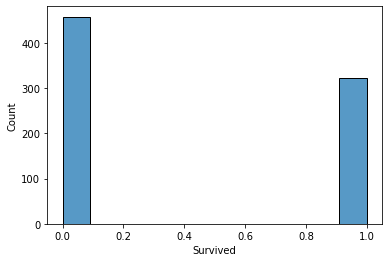

In [317]:
sns.histplot(data=df['Survived'])
survived_perc = round((df['Survived'].sum()) / len(df.index) * 100,2)
print(f'Percentage who survived: {survived_perc}%')

As previously stated Class imbalance found in Survived column.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

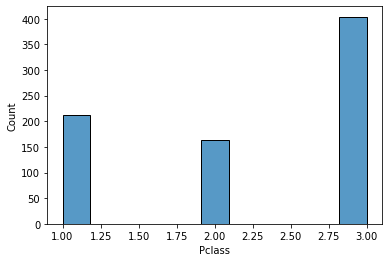

In [318]:
sns.histplot(data=df['Pclass'])

Pclass column is a categorical column, because numerical values in the column are just labels for Passenger class.

<AxesSubplot:xlabel='Age', ylabel='Count'>

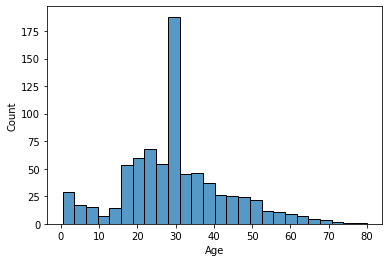

In [319]:
sns.histplot(data=df['Age'])

Although the data in the column 'Age' is uniformly distributed, it appears to be more concentrated around the value 30.

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

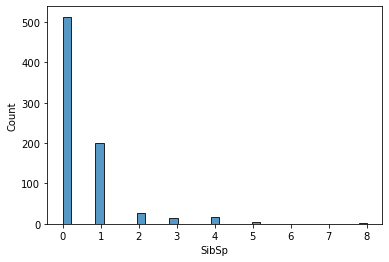

In [320]:
sns.histplot(data=df['SibSp'])

'SibSp' data shows the number of siblings/spouses aboard. Frequency of no. siblings/spouses aboard 0 is very high. 

<AxesSubplot:xlabel='Parch', ylabel='Count'>

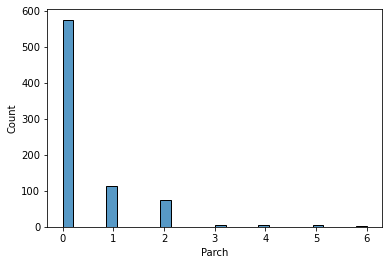

In [321]:
sns.histplot(data=df['Parch'])

'Parch' data shows the number of parents/children aboard.Frequency of no. parents/children aboard 0 is very high.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

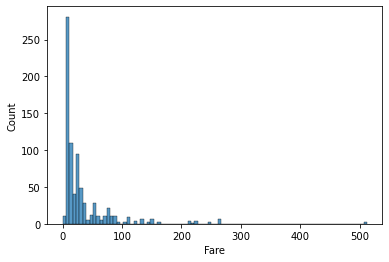

In [322]:
sns.histplot(data=df['Fare'])

1. Data in 'Fare' is negatively skewed. 
2. And some outliers are also present.

male      488
female    292
Name: Sex, dtype: int64

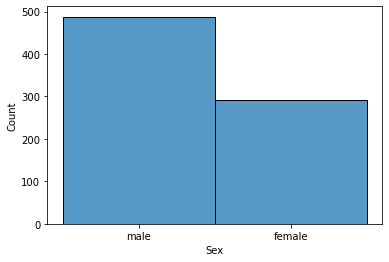

In [323]:
sns.histplot(data=df['Sex'])
df['Sex'].value_counts()

S    567
C    155
Q     58
Name: Embarked, dtype: int64

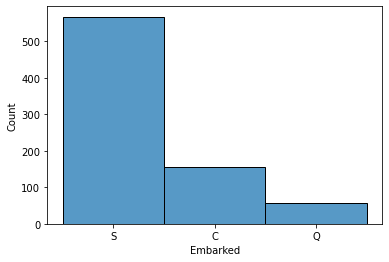

In [324]:
sns.histplot(data=df['Embarked'])
df['Embarked'].value_counts()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

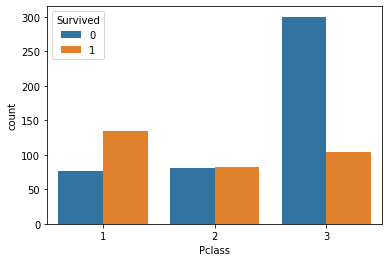

In [326]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

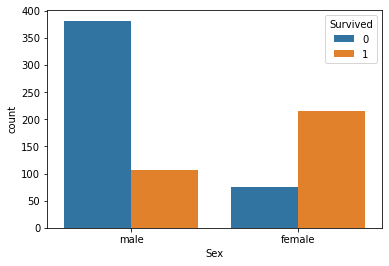

In [327]:
sns.countplot(x='Sex',hue='Survived',data=df)

Survival rate of women are greater than of men.

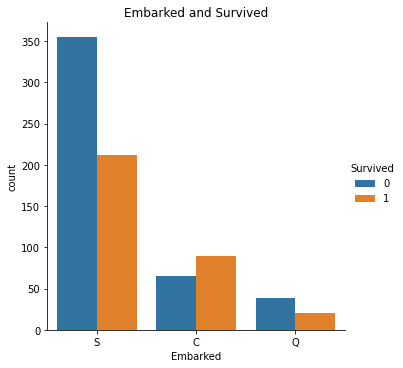

In [328]:
sns.catplot(x='Embarked', hue='Survived', data=df, kind='count').set(title='Embarked and Survived')
plt.show()

Survival of S class in Embarked is very high.

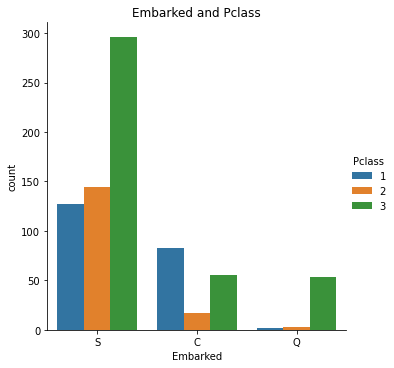

In [329]:
# Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', data=df, kind='count').set(title='Embarked and Pclass')
plt.show()

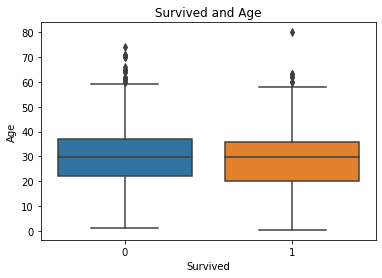

In [335]:
sns.boxplot(x='Survived', y='Age', data=df).set(title='Survived and Age')
plt.show()

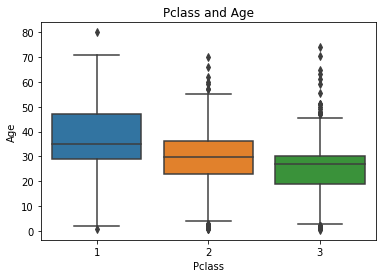

In [336]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=df).set(title='Pclass and Age')
plt.show()

Pclass 1 are older than of Pcalss 2 and 3 on average.

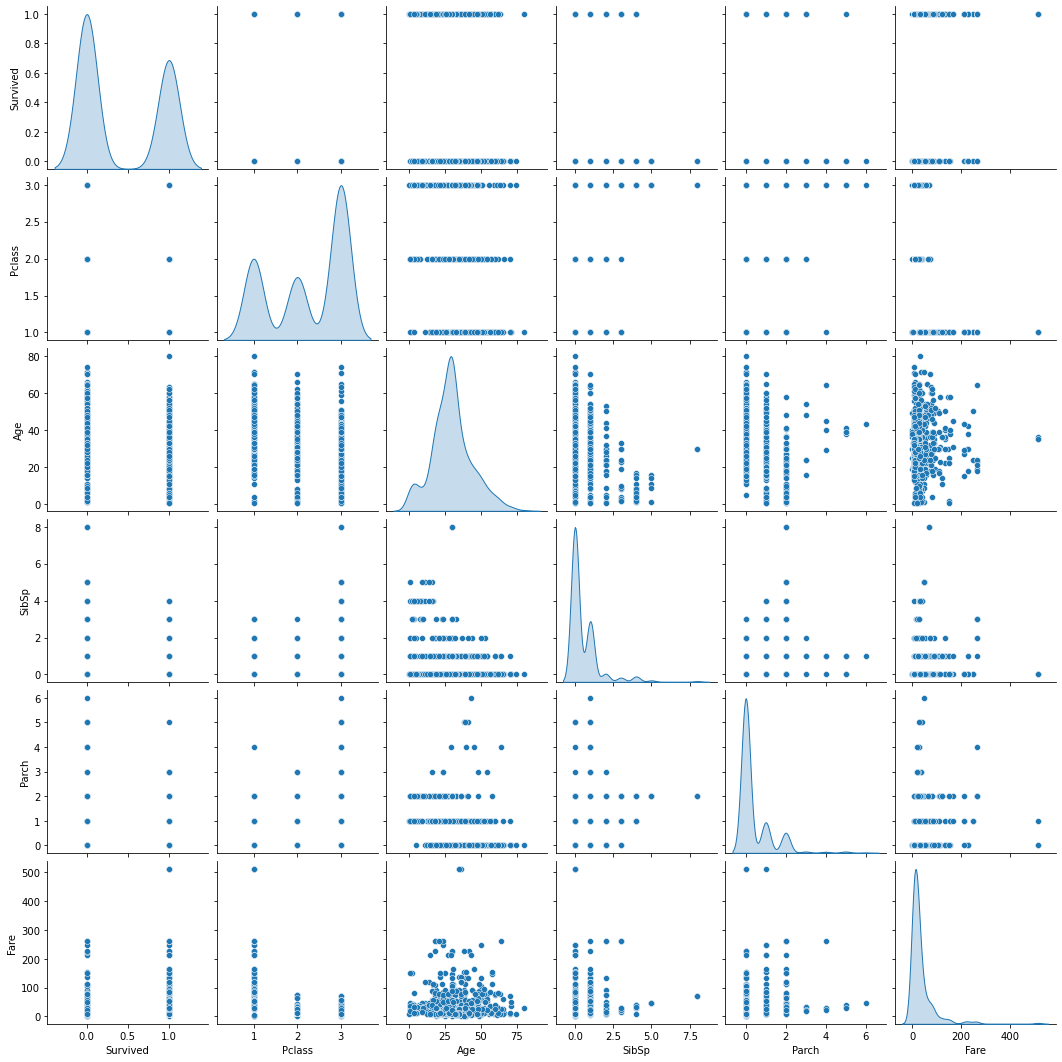

In [145]:
sns.pairplot(data=df,palette='deep',diag_kind='kde')

In [146]:
#Checking skewness
df.skew()

Survived    0.354825
Pclass     -0.494364
Age         0.397400
SibSp       3.046805
Parch       2.624282
Fare        4.561010
dtype: float64

Skewness found in Columns : 'SibSp','Parch' and'Fare'.

In [147]:
#removing skewness by using Squareroot method
df['Fare']=np.sqrt(df['Fare'])
df['SibSp']=np.sqrt(df['SibSp'])
df['Parch']=np.sqrt(df['Parch'])

In [148]:
df.skew()

Survived    0.354825
Pclass     -0.494364
Age         0.397400
SibSp       1.186444
Parch       1.398308
Fare        2.030046
dtype: float64

Still the skewness of the columns is high. By reducing the skewness more we may remove the natural characteristic of the data. Hence no longer removing the skewness.

<AxesSubplot:>

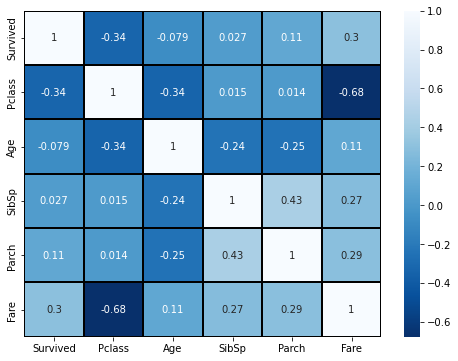

In [149]:
#checking corelation between varibles
cor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Blues_r',linewidths=0.2,annot=True,linecolor='black')

In [150]:
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336244,-0.079192,0.027452,0.109734,0.296743
Pclass,-0.336244,1.000000,-0.338528,0.014585,0.014023,-0.676997
Age,-0.079192,-0.338528,1.000000,-0.238816,-0.248302,0.109017
SibSp,0.027452,0.014585,-0.238816,1.000000,0.432258,0.270707
Parch,0.109734,0.014023,-0.248302,0.432258,1.000000,0.286296
Fare,0.296743,-0.676997,0.109017,0.270707,0.286296,1.000000


In [151]:
cor['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.296743
Parch       0.109734
SibSp       0.027452
Age        -0.079192
Pclass     -0.336244
Name: Survived, dtype: float64

No perfect/very strong correlation found in data.

In [152]:
#Separating the numerical cols and categorical cols

#for cat cols

catcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catcols.append(i)
print(catcols)

#for num cols

numcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numcols.append(i)       
print(numcols)

['Sex', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Encoding the categorical columns

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catcols:
    df[col] = le.fit_transform(df[col])

In [157]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,2.692582,2
1,1,1,0,38.0,1.0,0.0,8.442944,0
2,1,3,0,26.0,0.0,0.0,2.815138,2
3,1,1,0,35.0,1.0,0.0,7.286975,2
4,0,3,1,35.0,0.0,0.0,2.837252,2


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    int64  
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    float64
 5   Parch     780 non-null    float64
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 71.0 KB


In [159]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.625641,29.797600,0.405474,0.320969,5.067467,1.528205
std,0.492657,0.854452,0.484267,13.708883,0.601411,0.561544,3.026819,0.804655
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.750000,0.000000,0.000000,2.837252,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,3.993740,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,5.863020,2.000000
max,1.000000,3.000000,1.000000,80.000000,2.828427,2.449490,22.634690,2.000000


In [160]:
x=df.drop('Survived',axis=1)
y=df['Survived']

Checking Variance

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF Values,features
0,5.302281,Pclass
1,2.872428,Sex
2,5.410222,Age
3,1.955225,SibSp
4,1.875527,Parch
5,4.112392,Fare
6,4.530719,Embarked


VIF is within acceptable range.

In [163]:
y.value_counts()

0    458
1    322
Name: Survived, dtype: int64

Class imbalance found.

In [164]:
#Using SMOTE (Synthetic Minority Over-sampling Technique) for oversampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [165]:
y.value_counts()

0    458
1    458
Name: Survived, dtype: int64

Class balance achieved.

# MODELING

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [167]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train, y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best acc is ', maxAccu, 'at random state', maxRs)

Best acc is  0.8695652173913043 at random state 60


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [169]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=maxRs)
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
prfc=rfc.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.8586956521739131
[[73  9]
 [17 85]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        82
           1       0.90      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Best accuracy of Randon Forest Classifier model is 85.86%

In [172]:
lr=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=maxRs)
lr.fit(x_train, y_train, sample_weight=None)
plr=lr.predict(x_test)
print(accuracy_score(y_test,plr))
print(confusion_matrix(y_test,plr))
print(classification_report(y_test,plr))

0.8152173913043478
[[67 15]
 [19 83]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.85      0.81      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



Best accuracy of Logistic Regression model is 81.52%

In [173]:
svc=SVC()
svc.fit(x_train,y_train)
psvc=svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.6521739130434783
[[64 18]
 [46 56]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        82
           1       0.76      0.55      0.64       102

    accuracy                           0.65       184
   macro avg       0.67      0.66      0.65       184
weighted avg       0.68      0.65      0.65       184



Best accuracy of SVC model is 65.21%

In [174]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pgb=gb.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.8478260869565217
[[73  9]
 [19 83]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        82
           1       0.90      0.81      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Best accuracy of Gradient Boosting Classifier is 84.78%

In [175]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pabc=abc.predict(x_test)
print(accuracy_score(y_test,pabc))
print(confusion_matrix(y_test,pabc))
print(classification_report(y_test,pabc))

0.8315217391304348
[[69 13]
 [18 84]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        82
           1       0.87      0.82      0.84       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



Best accuracy of AdaBoost Classifier is 83.15%

In [176]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pbc=bc.predict(x_test)
print(accuracy_score(y_test,pbc))
print(confusion_matrix(y_test,pbc))
print(classification_report(y_test,pbc))

0.8478260869565217
[[70 12]
 [16 86]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.88      0.84      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Best accuracy of Bagging Classifier is 84.78%

In [177]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
petc=etc.predict(x_test)
print(accuracy_score(y_test,petc))
print(confusion_matrix(y_test,petc))
print(classification_report(y_test,petc))

0.8315217391304348
[[68 14]
 [17 85]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        82
           1       0.86      0.83      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



Best accuracy of Extra Tress Classifier model is 83.15%

Checking Cross Validation Score of all the models.

In [178]:
from sklearn.model_selection import cross_val_score

In [179]:
scr=cross_val_score(rfc,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,prfc) - scr.mean())

[0.69565217 0.79781421 0.7431694  0.86338798 0.84699454]
0.7894036588263246
Diff b/w Accuracy score & CV score  0.06929199334758851


In [180]:
scr=cross_val_score(lr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,plr) - scr.mean())

[0.73913043 0.77595628 0.72131148 0.82513661 0.83606557]
0.77952007602756
Diff b/w Accuracy score & CV score  0.03569731527678777


In [181]:
scr=cross_val_score(svc,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,psvc) - scr.mean())

[0.56521739 0.67759563 0.67759563 0.73224044 0.72677596]
0.6758850083155143
Diff b/w Accuracy score & CV score  -0.023711095272036076


In [182]:
scr=cross_val_score(gb,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,pgb) - scr.mean())

[0.75       0.80327869 0.73224044 0.87978142 0.87431694]
0.8079234972677595
Diff b/w Accuracy score & CV score  0.03990258968876226


In [183]:
scr=cross_val_score(abc,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,pabc) - scr.mean())

[0.71195652 0.79781421 0.75409836 0.87431694 0.86885246]
0.8014076977904491
Diff b/w Accuracy score & CV score  0.030114041339985742


In [184]:
scr=cross_val_score(bc,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,pbc) - scr.mean())

[0.71195652 0.80327869 0.72131148 0.86885246 0.83060109]
0.7872000475172249
Diff b/w Accuracy score & CV score  0.060626039439296786


In [185]:
scr=cross_val_score(etc,x,y)
print(scr)
print(scr.mean())
print('Diff b/w Accuracy score & CV score ', accuracy_score(y_test,petc) - scr.mean())

[0.70108696 0.78142077 0.74863388 0.80874317 0.85245902]
0.7784687574245664
Diff b/w Accuracy score & CV score  0.05305298170586836


# Gradient Boosting Classifier is our best model!

# Hyperparameter Tuning

In [186]:
#importing GridseachCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [204]:
#parameters for Gradient Boosting classifier model:
parameters = {
'loss': ['deviance', 'exponential'],
'learning_rate': [0.05, 0.1, 0.2],
'n_estimators': [1,10,50],
'subsample': [0.8, 1.0],
'criterion': ['friedman_mse', 'mse'],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_depth': [3, 5, 7],
'max_features': ['sqrt', 'log2', None],
'random_state': [42],
'warm_start': [True, False],
'ccp_alpha': [0.0, 0.1, 0.5]
}

In [205]:
#Cross validation cv=5
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [206]:
#running the training set in GridsearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5],
                         'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 10, 50], 'random_state': [42],
                         'subsample': [0.8, 1.0], 'warm_start': [True, False]})

In [207]:
#Finding the best parameters
GCV.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 42,
 'subsample': 0.8,
 'warm_start': True}

These are the best parameters for our model.

In [208]:
#Creating the final model
Final_model=GradientBoostingClassifier(ccp_alpha=0.0,criterion='friedman_mse',learning_rate=0.1,loss='exponential',max_depth=3,max_features=None,min_samples_leaf=2,min_samples_split=5,n_estimators=50,random_state=42,subsample=0.8,warm_start=True)

In [209]:
#Training the final model
Final_model.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=50,
                           random_state=42, subsample=0.8, warm_start=True)

In [210]:
#Final prediction
Fp=Final_model.predict(x_test)
acc=accuracy_score(y_test,Fp)
print(acc*100)

84.78260869565217


The final prediction model accuracy is 84.78%.

In [211]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

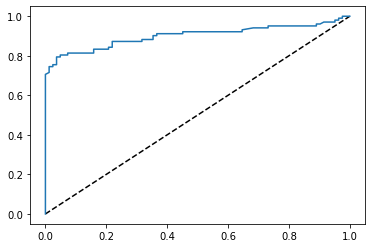

Auc Score:  
 0.8519846963175515


In [212]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc= auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier(area=%0.2f)'%roc_auc)
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('Auc Score: ','\n',auc_score)

AUC Score is closer to 1.

ROC Curve of our Final model

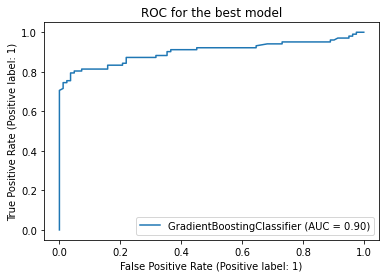

In [214]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(Final_model,x_test,y_test)
plt.title('ROC for the best model')
plt.show()

In [274]:
#Saving our model
import joblib
joblib.dump(Final_model,'Titanic.pkl')

['Titanic.pkl']

In [276]:
#checking if our saved model is working
model = joblib.load('Titanic.pkl')

prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)